In [1]:
import matplotlib 
matplotlib.use('Agg') 
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def plot_logs(history):
    evaluation_cost = history.history['val_loss']
    evaluation_accuracy = history.history['val_acc']
    training_cost = history.history['loss']
    training_accuracy = history.history['acc']
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figwidth(10)
    ax1.plot(evaluation_cost,label= 'test')
    ax1.plot(training_cost, label='train')
    ax1.set_title('Cost')
    ax1.legend()
    ax2.plot(evaluation_accuracy, label='test')
    ax2.plot(training_accuracy, label='train')
    ax2.set_title('Accuracy')
    ax2.legend(loc='lower right')

In [8]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


batch_size = 10
nb_classes = 10
nb_epoch = 30

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)[:50000,:]
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train[:50000], nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)



50000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Dense(30, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1.0),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

In [13]:
model2 = Sequential()
model2.add(Dense(784, input_shape=(784,)))
model2.add(Activation('sigmoid'))
model2.add(Dense(784))
model2.add(Activation('sigmoid'))
model2.add(Dense(10))
model2.add(Activation('sigmoid'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1.0),
              metrics=['accuracy'])

history = model2.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=2, validation_data=(X_test, Y_test))
score = model2.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
activation_11 (Activation)   (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 784)               615440    
_________________________________________________________________
activation_12 (Activation)   (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


/home/diegoami/anaconda3/envs/dsretreat/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


10s - loss: 1.2975 - acc: 0.4467 - val_loss: 0.2437 - val_acc: 0.9270
Epoch 2/30
10s - loss: 0.2021 - acc: 0.9376 - val_loss: 0.1417 - val_acc: 0.9526
Epoch 3/30
10s - loss: 0.1256 - acc: 0.9605 - val_loss: 0.1189 - val_acc: 0.9623
Epoch 4/30
10s - loss: 0.0890 - acc: 0.9721 - val_loss: 0.1154 - val_acc: 0.9664
Epoch 5/30
11s - loss: 0.0676 - acc: 0.9786 - val_loss: 0.0931 - val_acc: 0.9728
Epoch 6/30
11s - loss: 0.0511 - acc: 0.9832 - val_loss: 0.0869 - val_acc: 0.9734
Epoch 7/30
11s - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0905 - val_acc: 0.9739
Epoch 8/30
11s - loss: 0.0331 - acc: 0.9887 - val_loss: 0.0844 - val_acc: 0.9767
Epoch 9/30
11s - loss: 0.0253 - acc: 0.9918 - val_loss: 0.0872 - val_acc: 0.9768
Epoch 10/30
11s - loss: 0.0168 - acc: 0.9946 - val_loss: 0.0772 - val_acc: 0.9802
Epoch 11/30
10s - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0729 - val_acc: 0.9823
Epoch 12/30
10s - loss: 0.0111 - acc: 0.9962 - val_loss: 0.0945 - val_acc: 0.9786
Epoch 13/30
10s - loss: 0.0124 - acc

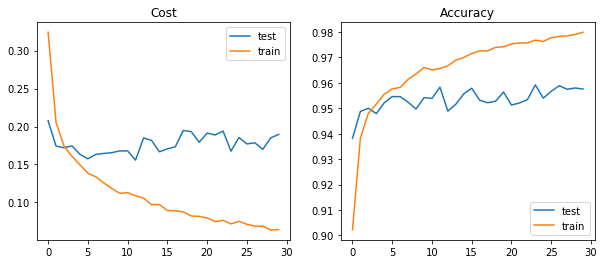

In [5]:
plot_logs(history)

In [8]:
## now with convolution layers

In [14]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

np.random.seed(1337)  # for reproducibility
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/home/diegoami/anaconda3/envs/dsretreat/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
/home/diegoami/anaconda3/envs/dsretreat/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/diegoami/anaconda3/envs/dsretreat/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
7s - loss: 1.5899 - acc: 0.4828 - val_loss: 0.4340 - val_acc: 0.8839
Epoch 2/12
7s - loss: 0.6076 - acc: 0.8149 - val_loss: 0.2748 - val_acc: 0.9126
Epoch 3/12
7s - loss: 0.4590 - acc: 0.8603 - val_loss: 0.2236 - val_acc: 0.9335
Epoch 4/12
7s - loss: 0.4005 - acc: 0.8786 - val_loss: 0.1917 - val_acc: 0.9417
Epoch 5/12
7s - loss: 0.3616 - acc: 0.8935 - val_loss: 0.1785 - val_acc: 0.9441
Epoch 6/12
6s - loss: 0.3399 - acc: 0.8988 - val_loss: 0.1643 - val_acc: 0.9500
Epoch 7/12
7s - loss: 0.3175 - acc: 0.9039 - val_loss: 0.1534 - val_acc: 0.9531
Epoch 8/12
7s - loss: 0.2995 - acc: 0.9103 - val_loss: 0.1484 - val_acc: 0.9560
Epoch 9/12
7s - loss: 0.2823 - acc: 0.9158 - val_loss: 0.1349 - val_acc: 0.9573
Epoch 10/12
7s - loss: 0.2733 - acc: 0.9181 - val_loss: 0.1281 - val_acc: 0.9588
Epoch 11/12
7s - loss: 0.2614 - acc: 0.9215 - val_loss: 0.1287 - val_acc: 0.9609
Epoch 12/12
7s - loss: 0.2550 - acc: 0.9246 - val_loss: 0.1200 - val

In [ ]:
plot_logs(history)